<a href="https://colab.research.google.com/github/Thinsheep/TrainingTrack/blob/main/MNIST_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist # to get the access to this dataset
from keras.models import Sequential # to define model
from keras.layers import Dense # to provide layers connected together to have fully connected layer
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical # to working with multicass dataset, on hot encoding
import random

In [ ]:
np.random.seed(0) # to get the same number each time we call

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # load mnist dataset

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0]) # 60000 images, 28x28 pixels

(60000, 28, 28)
(10000, 28, 28)
60000


In [ ]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (28,28)), "The dimension of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimension of the images are not 28x28"
# This is to check if the datasets imported correctly or not

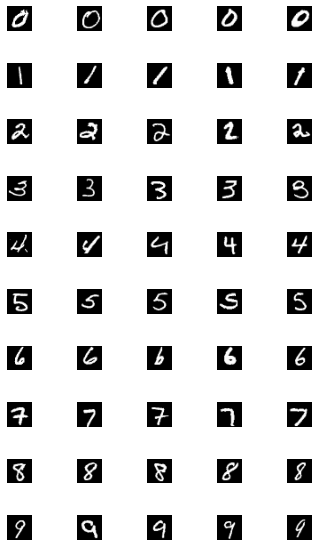

In [ ]:
num_of_samples = [] # recording images and category, each category contain 10 rows of images and 5 colums

cols = 5
num_classes =10

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8)) # allow to display multiple plot in the same figure
#5 inches height and 10 inches width
fig.tight_layout() # dealing with overlappig layout
# now we loop through every colum and everrow
for i in range(cols):
  for j in range(num_classes):
      x_selected = X_train[y_train == j] # select the images in the training data
      axs[j][i].imshow(x_selected[random.randint(0, len(x_selected -1)), :, :], cmap = plt.get_cmap("gray"))# get correct color 
      # first index 0, and last index len() of the array, :: make sure get entire image
      axs[j][i].axis("off")
      


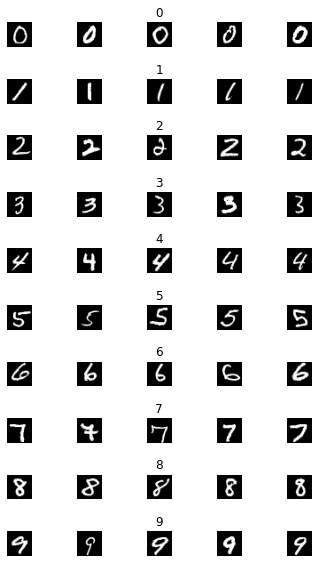

In [ ]:
num_of_samples = [] # recording images and category, each category contain 10 rows of images and 5 colums
cols = 5
num_classes =10

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8)) # allow to display multiple 
#plot in the same figure
#5 inches height and 10 inches width
fig.tight_layout() # dealing with overlappig layout
# now we loop through every colum and everrow
for i in range(cols):
  for j in range(num_classes):
      x_selected = X_train[y_train == j] # select the images in the training data
      axs[j][i].imshow(x_selected[random.randint(0, len(x_selected -1)), :, :], cmap = plt.get_cmap("gray"))
      # get correct color 
      # first index 0, and last index len() of the array, :: make sure get entire image
      axs[j][i].axis("off")
      if i ==2:
        axs[j][i].set_title(str(j)) # currently we show only 5 samples per class but accutally we have thousand
        num_of_samples.append(len(x_selected)) # record number of samples of each class appended into a sigle 
        #array, able to multiply

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

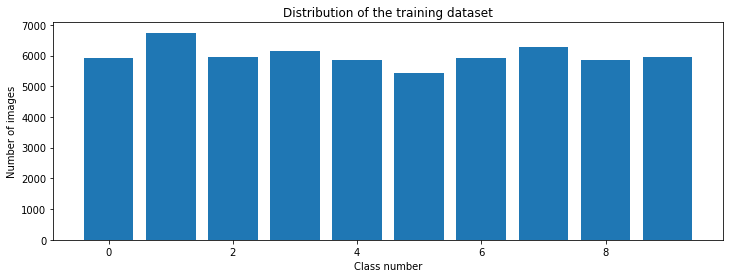

In [ ]:
print(num_of_samples) # amount of images belong to each class
plt.figure(figsize=(12, 4)) # just size of graph
plt.bar(range(0, num_classes), num_of_samples) # attributes for x and y axis
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [ ]:
y_train = to_categorical(y_train, 10) # 10 is the number of classes, make one hot encoding
y_test = to_categorical(y_test, 10)

In [ ]:
X_train = X_train/255 # normalizing the data
X_test = X_test/255 # 
# Well our training data for instance contains 60000 grayscale images each image containing pixel intensities from 0 to 255.
# We choose to divide by 255 because we want to normalize our data to be in a range between 0 and 1.
# Therefore by dividing by 255 This ensures that the maximum pixel value 255 is normalized down to the maximum value of 1.
# We need to ensure that our data has a low variance. This helps the neural network better deal with the input data and to
# learn more quickly and accurately. Since these functions use a base of e with exponents you can see that E to the exponent 1 
# is going to be a much smaller value than each of the exponent of 255.
# we got to prepare dataset before we can training them

In [ ]:
num_pixels = 784 # 784 colum pixels
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)

(60000, 784)


In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim= num_pixels, activation= 'relu'))# each line is one hidden 
  #now we increase number of node instead of 10, it make the number of para very huge
  model.add(Dense(30, activation='relu'))# change 30 nodes to improve the model
  model.add(Dense(10, activation='relu'))# add one model hidden layer because wrong prediction
  model.add(Dense(num_classes, activation ='softmax'))
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = create_model()
print(model.summary()) # param mean weight and bias values

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_7 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, validation_split= 0.1, epochs= 10, batch_size= 200, verbose= 1, shuffle= 1)

Epoch 1/10
270/270 [==============================] - 1s 4ms/step - loss: 0.4724 - accuracy: 0.8555 - val_loss: 0.2452 - val_accuracy: 0.9293
Epoch 2/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2753 - accuracy: 0.9192 - val_loss: 0.2156 - val_accuracy: 0.9370
Epoch 3/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2541 - accuracy: 0.9244 - val_loss: 0.1982 - val_accuracy: 0.9435
Epoch 4/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2283 - accuracy: 0.9321 - val_loss: 0.1921 - val_accuracy: 0.9423
Epoch 5/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2207 - accuracy: 0.9341 - val_loss: 0.1833 - val_accuracy: 0.9460
Epoch 6/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2080 - accuracy: 0.9371 - val_loss: 0.2062 - val_accuracy: 0.9392
Epoch 7/10
270/270 [==============================] - 1s 3ms/step - loss: 0.1998 - accuracy: 0.9407 - val_loss: 0.1845 - val_accuracy: 0.9483
Epoch 

Text(0.5, 0, 'epoch')

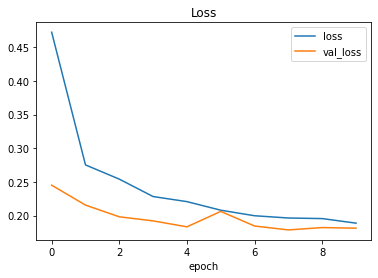

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch') # validation loss is lower than loss
# the more epoch we run the validation loss and the loss approach each other
# In this case model keep memorize the training set then fail to generalize itself.

Text(0.5, 0, 'epoch')

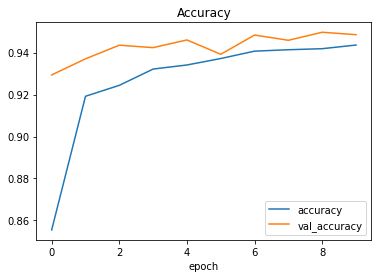

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch') # validation loss is lower than loss
# the more epoch we run the validation loss and the loss approach each other
# In this case model keep memorize the training set then fail to generalize itself.

In [ ]:
score = model.evaluate(X_test, y_test, verbose= 0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.21363016963005066
Test accuracy: 0.9383999705314636


<Response [200]>


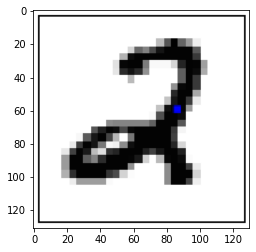

In [ ]:
import requests
from PIL import Image # PIL mean Python Imaging Library
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
print(response)
img =Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(131, 130, 3)


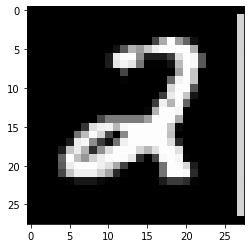

In [ ]:
import cv2 # openCV library computer vision library
img_array = np.asarray(img)
print(img_array.shape) # we need to reshape the image
resized = cv2.resize(img_array,(28,28)) # we resize because our network trained by 28x28 images
# it will be trouble to recognize the image at different size
#~print(resized)
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale) # to reverse black white image, 255 to 0 and reverse
plt.imshow(gray_scale, cmap = plt.get_cmap("gray"))
plt.imshow(image, cmap = plt.get_cmap("gray"))
# we have the back ground pixel 255: white, number is 0: in black but the traing image is opposite
# so we need to use cv2.bitwise_not

In [ ]:
image = image/255
image = image.reshape(1, 784)
print(image)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.82352941 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.82352941
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.      

In [ ]:
prediction = np.argmax(model.predict(image), axis=-1)
print("predicted digit:", str(prediction))

predicted digit: [2]
